In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

TODDLER DATASET

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ASD/Dataset/Toddler Autism dataset July 2018 (1).csv")
df.head()

,cv,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df.columns

Index([' cv', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
# Unique values of Age Column
unique_values = df['Age_Mons'].unique()
print(unique_values)
print(unique_values/12)
print(df['Ethnicity'].unique())

[28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
[2.33333333 3.         2.         1.66666667 1.75       2.75
 1.83333333 1.41666667 2.08333333 1.25       1.5        1.
 2.41666667 2.91666667 2.66666667 1.58333333 1.16666667 1.08333333
 2.5        1.91666667 2.83333333 2.16666667 2.58333333 2.25
 1.33333333]
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']


In [ ]:
df=df.drop("Qchat-10-Score",axis=1)

In [ ]:
df['Age_Mons'] = df['Age_Mons'] / 12

In [ ]:
df.columns = df.columns.str.strip()
label_encoder = LabelEncoder()
df['Class/ASD Traits']=label_encoder.fit_transform(df['Class/ASD Traits'])

In [ ]:
df.shape

(1054, 18)

In [ ]:
x=df.iloc[:,0:17]
y=df["Class/ASD Traits"]

In [ ]:
df.rename(columns={'Who completed the test': 'Who_completed_the_test'}, inplace=True)
df.rename(columns={'jaundice': 'Jaundice'}, inplace=True)
new_columns = {f'A{i}': f'A{i}_score' for i in range(1, 11)}
df.rename(columns=new_columns, inplace=True)

In [ ]:
columns_to_encode = ['Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    # Rename columns A1, A2, ..., A10 to A1_score, A2_score, ..., A10_score
new_columns = {f'A{i}': f'A{i}_score' for i in range(1, 11)}
df.rename(columns=new_columns, inplace=True)

In [ ]:
df.columns

Index(['A1_score', 'A2_score', 'A3_score', 'A4_score', 'A5_score', 'A6_score',
       'A7_score', 'A8_score', 'A9_score', 'A10_score', 'Age_Mons', 'Sex',
       'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits'],
      dtype='object')

In [ ]:
#df=df.drop('Family_mem_with_ASD',axis=1)
df=df.drop('Who_completed_the_test',axis=1)
df=df.drop('cv',axis=1)


print(df.columns)
df.to_csv('Toddler.csv', index=False)

KeyError: "['Who_completed_the_test'] not found in axis"

In [ ]:
df['Age_Mons']

0       2.333333
1       3.000000
2       3.000000
3       2.000000
4       1.666667
          ...   
1049    2.000000
1050    1.000000
1051    1.500000
1052    1.583333
1053    2.000000
Name: Age_Mons, Length: 1054, dtype: float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
Toddler_df=df.copy()
columns_to_encode = ['Sex','Ethnicity','Jaundice']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    Toddler_df[column] = label_encoder.fit_transform(Toddler_df[column])

# Assuming `autism_data` is your DataFrame
X = Toddler_df.drop('Class/ASD Traits', axis=1)
y = Toddler_df['Class/ASD Traits']
print(X.columns)

X_train, X_test, y_train_T, y_test_T = train_test_split(X, y, test_size=0.2, random_state=0)

print(Toddler_df.head())


Index(['A1_score', 'A2_score', 'A3_score', 'A4_score', 'A5_score', 'A6_score',
       'A7_score', 'A8_score', 'A9_score', 'A10_score', 'Age_Mons', 'Sex',
       'Ethnicity', 'Jaundice', 'Family_mem_with_ASD'],
      dtype='object')
   A1_score  A2_score  A3_score  A4_score  A5_score  A6_score  A7_score  \
0         0         0         0         0         0         0         1   
1         1         1         0         0         0         1         1   
2         1         0         0         0         0         0         1   
3         1         1         1         1         1         1         1   
4         1         1         0         1         1         1         1   

   A8_score  A9_score  A10_score  Age_Mons  Sex  Ethnicity  Jaundice  \
0         1         0          1  2.333333    0          8         1   
1         0         0          0  3.000000    1          5         1   
2         1         0          1  3.000000    1          8         1   
3         1         1        

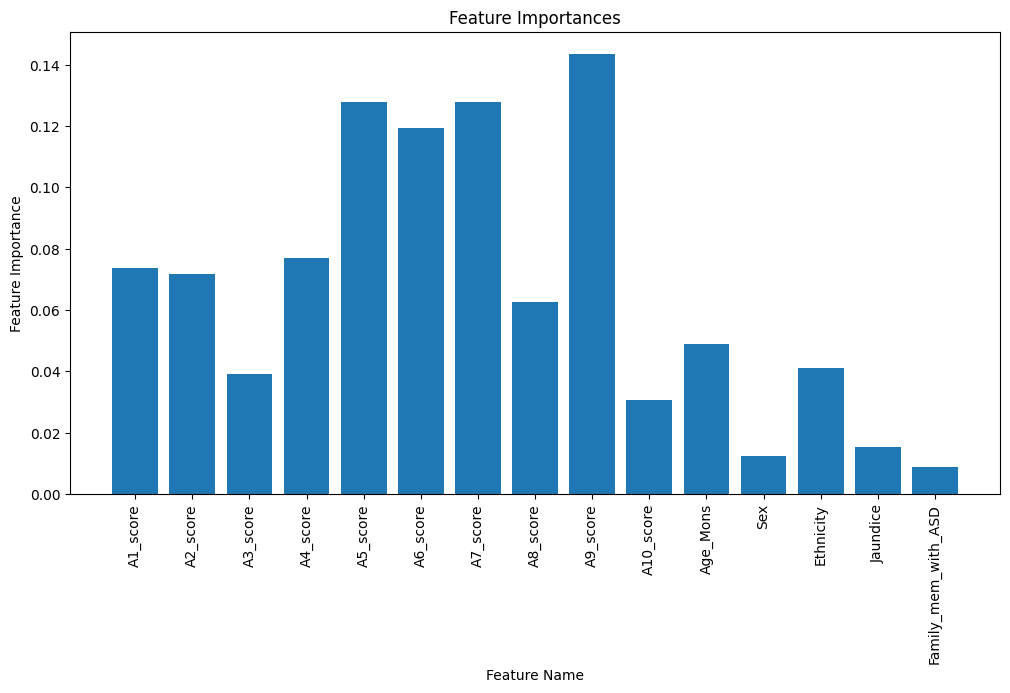

Overall Importance of All Features: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and testing data
rf = RandomForestClassifier()
rf.fit(X_train, y_train_T)

# Get feature importances
importances = rf.feature_importances_

# Calculate overall importance
overall_importance = np.sum(importances)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

print(f"Overall Importance of All Features: {overall_importance}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing data
rf = RandomForestClassifier()
rf.fit(X_train, y_train_T)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Print individual feature importances
for feature_name, importance in zip(feature_names, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")


Feature: A1_score, Importance: 0.07185332697202747
Feature: A2_score, Importance: 0.08202889306787332
Feature: A3_score, Importance: 0.040778818276834265
Feature: A4_score, Importance: 0.0908154160117006
Feature: A5_score, Importance: 0.12751002607457582
Feature: A6_score, Importance: 0.1268971886791162
Feature: A7_score, Importance: 0.11863460996931091
Feature: A8_score, Importance: 0.061351577555466455
Feature: A9_score, Importance: 0.12281524748436067
Feature: A10_score, Importance: 0.030111529497736877
Feature: Age_Mons, Importance: 0.049457051873677056
Feature: Sex, Importance: 0.013209155701757822
Feature: Ethnicity, Importance: 0.04126391383715943
Feature: Jaundice, Importance: 0.014299369287267763
Feature: Family_mem_with_ASD, Importance: 0.008973875711135379


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled_T = scaler.fit_transform(X_train)
X_test_scaled_T = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'MLP': MLPClassifier(max_iter=500),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier()
}

# Evaluate and compare classifiers
results = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled_T, y_train_T)

    # Make predictions
    y_pred = clf.predict(X_test_scaled_T)

    # Evaluate different metrics
    accuracy = accuracy_score(y_test_T, y_pred)
    roc_auc = roc_auc_score(y_test_T, clf.predict_proba(X_test_scaled_T)[:, 1])
    f1 = f1_score(y_test_T, y_pred)
    precision = precision_score(y_test_T, y_pred)
    recall = recall_score(y_test_T, y_pred)
    mcc = matthews_corrcoef(y_test_T, y_pred)
    kappa = cohen_kappa_score(y_test_T, y_pred)
    logloss = log_loss(y_test_T, clf.predict_proba(X_test_scaled_T)[:, 1])

    # Store results
    results[clf_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'MCC': mcc,
        'Kappa': kappa,
        'Log Loss': logloss
    }

# Display results
print("Classification Results:")
for clf_name, metrics in results.items():
    print(f"{clf_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")


Classification Results:
MLP:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.0142


AdaBoost:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.5092


Random Forest:
  Accuracy: 0.9858
  ROC AUC: 0.9988
  F1-Score: 0.9902
  Precision: 0.9934
  Recall: 0.9869
  MCC: 0.9646
  Kappa: 0.9645
  Log Loss: 0.1095


Decision Tree:
  Accuracy: 0.9479
  ROC AUC: 0.9373
  F1-Score: 0.9639
  Precision: 0.9671
  Recall: 0.9608
  MCC: 0.8700
  Kappa: 0.8699
  Log Loss: 1.8791


Naive Bayes:
  Accuracy: 0.9384
  ROC AUC: 0.9924
  F1-Score: 0.9571
  Precision: 0.9667
  Recall: 0.9477
  MCC: 0.8484
  Kappa: 0.8479
  Log Loss: 0.0920


Logistic Regression:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.0244


SVM:
  Accuracy: 0.9905
  ROC AUC

CHILD DATASET

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/ASD/Dataset/csv_result-Autism-Child-Data.csv")
df1.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
df1.shape

(292, 22)

In [ ]:
df1.rename(columns={'jundice': 'jaundice'}, inplace=True)
df1.rename(columns={'austim': 'autism'}, inplace=True)
df1.rename(columns={'age': 'Age'}, inplace=True)
df1.rename(columns={'jaundice': 'Jaundice'}, inplace=True)
df1.rename(columns={'gender': 'Gender'}, inplace=True)
df1.rename(columns={'ethnicity': 'Ethnicity'}, inplace=True)
print(df1.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age',
       'Gender', 'Ethnicity', 'Jaundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [ ]:
# Unique values of Age Column
unique_values = df1['Age'].unique()
print(unique_values)
print(df1['Ethnicity'].unique())

['6' '5' '4' '11' '10' '8' '7' '9' '?']
['Others' 'Middle Eastern ' '?' 'White-European' 'Black' 'South Asian'
 'Asian' 'Pasifika' 'Hispanic' 'Turkish' 'Latino']


In [ ]:
df1['Age']=pd.to_numeric(df1['Age'],errors='coerce')

In [ ]:
df1.drop(['age_desc','id','result','used_app_before','contry_of_res','relation','result'],axis=1,inplace=True)
#'autism'

In [ ]:
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jaundice,autism,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,no,no,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,?,no,no,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,?,yes,no,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,f,White-European,yes,yes,YES
288,1,0,0,0,1,0,1,0,0,1,7.0,f,White-European,yes,yes,NO
289,1,0,1,1,1,1,1,0,0,1,4.0,m,Latino,no,no,YES
290,1,1,1,0,1,1,1,1,1,1,4.0,m,South Asian,no,no,YES


In [ ]:
columns_to_encode = ['Age','Gender', 'Ethnicity', 'Jaundice',  'Class/ASD','autism']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

In [ ]:
df1.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
Age          0
Gender       0
Ethnicity    0
Jaundice     0
autism       0
Class/ASD    0
dtype: int64

In [ ]:
df1['Age'].fillna(method='bfill',inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Assuming `autism_data` is your DataFrame
X = df1.drop('Class/ASD', axis=1)
y = df1['Class/ASD']
X_train, X_test, y_train_C, y_test_C = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.columns)


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'autism'],
      dtype='object')


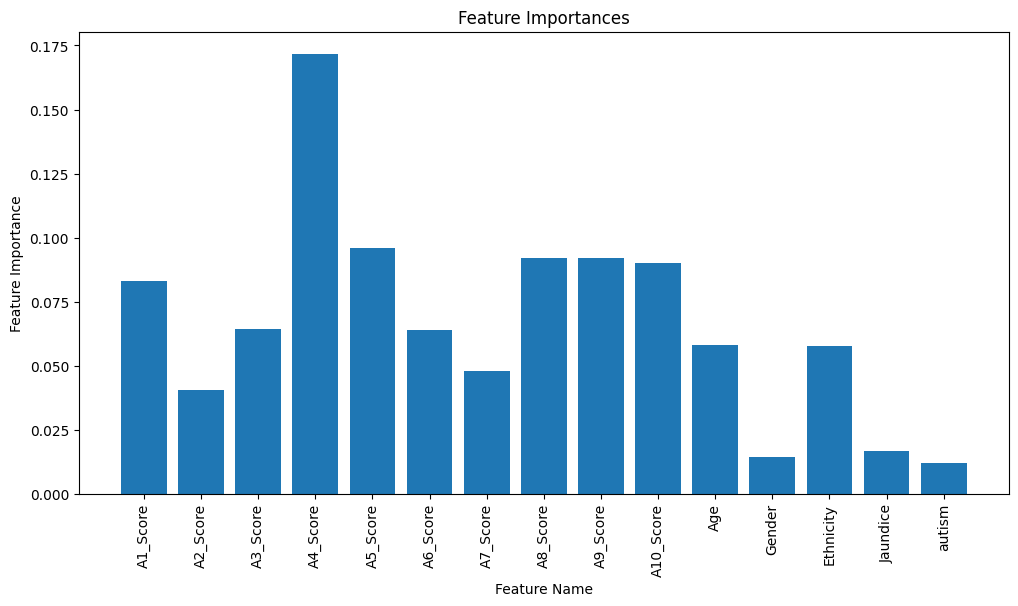

Overall Importance of All Features: 1.0
Feature: A1_Score, Importance: 0.08288139688849071
Feature: A2_Score, Importance: 0.04040664783410426
Feature: A3_Score, Importance: 0.06429369998925467
Feature: A4_Score, Importance: 0.17178053095714013
Feature: A5_Score, Importance: 0.0959470419996176
Feature: A6_Score, Importance: 0.06373497434937718
Feature: A7_Score, Importance: 0.04806334354274475
Feature: A8_Score, Importance: 0.09191840613402585
Feature: A9_Score, Importance: 0.09197887742536948
Feature: A10_Score, Importance: 0.09022171556254208
Feature: Age, Importance: 0.05821096429168278
Feature: Gender, Importance: 0.01448815961854387
Feature: Ethnicity, Importance: 0.05748651228462699
Feature: Jaundice, Importance: 0.01676100711903666
Feature: autism, Importance: 0.011826722003442994


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and testing data
rf = RandomForestClassifier()
rf.fit(X_train, y_train_C)

# Get feature importances
importances = rf.feature_importances_

# Calculate overall importance
overall_importance = np.sum(importances)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

print(f"Overall Importance of All Features: {overall_importance}")

# Print individual feature importances
for feature_name, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled_C = scaler.fit_transform(X_train)
X_test_scaled_C = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'MLP': MLPClassifier(max_iter=500),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier()
}

# Evaluate and compare classifiers
results = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled_C, y_train_C)

    # Make predictions
    y_pred = clf.predict(X_test_scaled_C)

    # Evaluate different metrics
    accuracy = accuracy_score(y_test_C, y_pred)
    roc_auc = roc_auc_score(y_test_C, clf.predict_proba(X_test_scaled_C)[:, 1])
    f1 = f1_score(y_test_C, y_pred)
    precision = precision_score(y_test_C, y_pred)
    recall = recall_score(y_test_C, y_pred)
    mcc = matthews_corrcoef(y_test_C, y_pred)
    kappa = cohen_kappa_score(y_test_C, y_pred)
    logloss = log_loss(y_test_C, clf.predict_proba(X_test_scaled_C)[:, 1])

    # Store results
    results[clf_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'MCC': mcc,
        'Kappa': kappa,
        'Log Loss': logloss
    }

# Display results
print("Classification Results:")
for clf_name, metrics in results.items():
    print(f"{clf_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")



Classification Results:
MLP:
  Accuracy: 0.9831
  ROC AUC: 1.0000
  F1-Score: 0.9825
  Precision: 0.9655
  Recall: 1.0000
  MCC: 0.9666
  Kappa: 0.9661
  Log Loss: 0.0463


AdaBoost:
  Accuracy: 0.9831
  ROC AUC: 1.0000
  F1-Score: 0.9825
  Precision: 0.9655
  Recall: 1.0000
  MCC: 0.9666
  Kappa: 0.9661
  Log Loss: 0.5782


Random Forest:
  Accuracy: 0.9492
  ROC AUC: 0.9954
  F1-Score: 0.9492
  Precision: 0.9032
  Recall: 1.0000
  MCC: 0.9032
  Kappa: 0.8986
  Log Loss: 0.2574


Decision Tree:
  Accuracy: 0.9153
  ROC AUC: 0.9194
  F1-Score: 0.9180
  Precision: 0.8485
  Recall: 1.0000
  MCC: 0.8436
  Kappa: 0.8315
  Log Loss: 3.0545


Naive Bayes:
  Accuracy: 0.8475
  ROC AUC: 0.9700
  F1-Score: 0.8364
  Precision: 0.8519
  Recall: 0.8214
  MCC: 0.6940
  Kappa: 0.6936
  Log Loss: 0.2130


Logistic Regression:
  Accuracy: 0.9831
  ROC AUC: 1.0000
  F1-Score: 0.9825
  Precision: 0.9655
  Recall: 1.0000
  MCC: 0.9666
  Kappa: 0.9661
  Log Loss: 0.0767


SVM:
  Accuracy: 0.9831
  ROC AUC

ADOLESCENT DATASET


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/ASD/Dataset/csv_result-Autism-Adolescent-Data.csv")
df2.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,2,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,3,0,0,0,0,0,0,0,0,1,...,f,?,no,no,AmericanSamoa,no,2,12-16 years,?,NO
3,4,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,5,1,1,1,1,1,1,1,0,0,...,f,?,no,no,Albania,no,7,12-16 years,?,YES


In [ ]:
df2.shape

(104, 22)

In [ ]:
df2.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# Unique values of Age Column
unique_values = df2['age'].unique()
print(unique_values)
print(df2['ethnicity'].unique())

[15 12 14 16 13]
['Hispanic' 'Black' '?' 'White-European' 'Middle Eastern ' 'South Asian'
 'Others' 'Latino' 'Asian']


In [ ]:
df2.rename(columns={'austim': 'autism'}, inplace=True)
print(df2.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [ ]:
columns_to_encode = ['gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD',]
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])
df2.rename(columns={'jundice': 'jaundice'}, inplace=True)
df2.rename(columns={'age': 'Age'}, inplace=True)
df2.rename(columns={'gender': 'Gender'}, inplace=True)
print(df1.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'autism', 'Class/ASD'],
      dtype='object')


In [ ]:
# Example using scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Load your data (replace with your data loading logic)
X = df2.drop('Class/ASD', axis=1)
y = df2['Class/ASD']
# Train a model (e.g., Random Forest)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Print feature names and importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


id: 0.0503
A1_Score: 0.0094
A2_Score: 0.0147
A3_Score: 0.0591
A4_Score: 0.0793
A5_Score: 0.0634
A6_Score: 0.0373
A7_Score: 0.0265
A8_Score: 0.0338
A9_Score: 0.0246
A10_Score: 0.0514
Age: 0.0193
Gender: 0.0068
ethnicity: 0.0269
jaundice: 0.0062
autism: 0.0055
contry_of_res: 0.0455
used_app_before: 0.0039
result: 0.4186
age_desc: 0.0046
relation: 0.0130


In [ ]:
df2 = df2.drop(['contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation'], axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Assuming `autism_data` is your DataFrame
X = df2.drop('Class/ASD', axis=1)
y = df2['Class/ASD']
X_train, X_test, y_train_Ao, y_test_Ao = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.columns)



Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age',
       'Gender', 'ethnicity', 'jaundice', 'autism'],
      dtype='object')


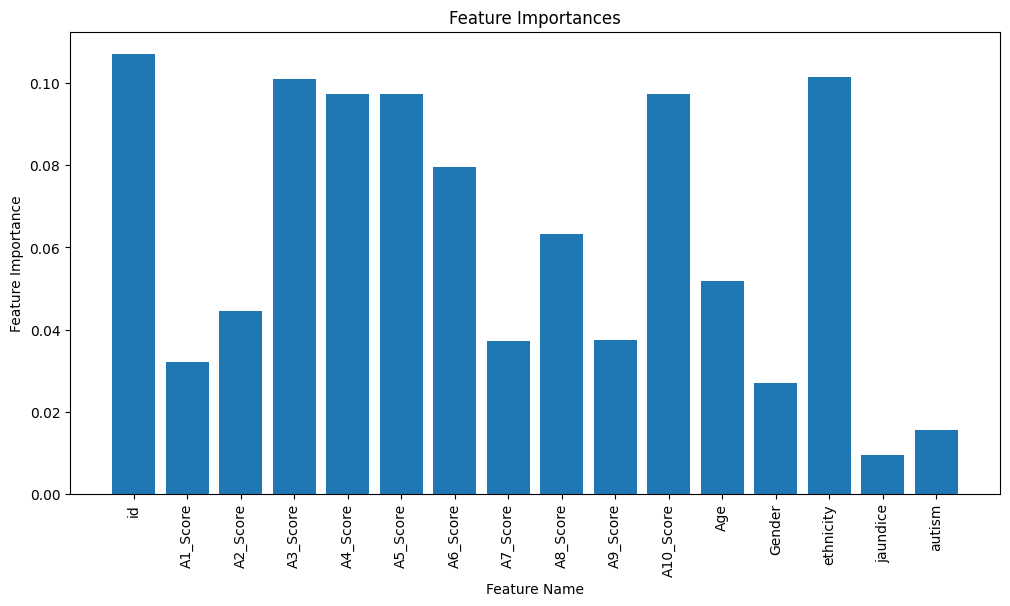

Overall Importance of All Features: 1.0
Feature: id, Importance: 0.10720107367281248
Feature: A1_Score, Importance: 0.032160903858307235
Feature: A2_Score, Importance: 0.04445857846327054
Feature: A3_Score, Importance: 0.10116399837759958
Feature: A4_Score, Importance: 0.09732041538377086
Feature: A5_Score, Importance: 0.09728238052648297
Feature: A6_Score, Importance: 0.07959525157052165
Feature: A7_Score, Importance: 0.03718956324621538
Feature: A8_Score, Importance: 0.06338190372991499
Feature: A9_Score, Importance: 0.03754012702627811
Feature: A10_Score, Importance: 0.0974641445629925
Feature: Age, Importance: 0.051797888103764345
Feature: Gender, Importance: 0.02687238997989826
Feature: ethnicity, Importance: 0.10160870305407267
Feature: jaundice, Importance: 0.00953741388958472
Feature: autism, Importance: 0.015425264554513714


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and testing data
rf = RandomForestClassifier()
rf.fit(X_train, y_train_Ao)

# Get feature importances
importances = rf.feature_importances_

# Calculate overall importance
overall_importance = np.sum(importances)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

print(f"Overall Importance of All Features: {overall_importance}")

# Print individual feature importances
for feature_name, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled_Ao = scaler.fit_transform(X_train)
X_test_scaled_Ao = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'MLP': MLPClassifier(max_iter=500),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier()
}

# Evaluate and compare classifiers
results = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled_Ao, y_train_Ao)

    # Make predictions
    y_pred = clf.predict(X_test_scaled_Ao)

    # Evaluate different metrics
    accuracy = accuracy_score(y_test_Ao, y_pred)
    roc_auc = roc_auc_score(y_test_Ao, clf.predict_proba(X_test_scaled_Ao)[:, 1])
    f1 = f1_score(y_test_Ao, y_pred)
    precision = precision_score(y_test_Ao, y_pred)
    recall = recall_score(y_test_Ao, y_pred)
    mcc = matthews_corrcoef(y_test_Ao, y_pred)
    kappa = cohen_kappa_score(y_test_Ao, y_pred)
    logloss = log_loss(y_test_Ao, clf.predict_proba(X_test_scaled_Ao)[:, 1])

    # Store results
    results[clf_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'MCC': mcc,
        'Kappa': kappa,
        'Log Loss': logloss
    }

# Display results
print("Classification Results:")
for clf_name, metrics in results.items():
    print(f"{clf_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")



Classification Results:
MLP:
  Accuracy: 0.9524
  ROC AUC: 1.0000
  F1-Score: 0.9630
  Precision: 1.0000
  Recall: 0.9286
  MCC: 0.9014
  Kappa: 0.8966
  Log Loss: 0.0779


AdaBoost:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.0000


Random Forest:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.1309


Decision Tree:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.0000


Naive Bayes:
  Accuracy: 0.8571
  ROC AUC: 0.9796
  F1-Score: 0.8800
  Precision: 1.0000
  Recall: 0.7857
  MCC: 0.7416
  Kappa: 0.7097
  Log Loss: 1.3338


Logistic Regression:
  Accuracy: 0.9524
  ROC AUC: 1.0000
  F1-Score: 0.9630
  Precision: 1.0000
  Recall: 0.9286
  MCC: 0.9014
  Kappa: 0.8966
  Log Loss: 0.0847


SVM:
  Accuracy: 0.9524
  ROC AUC

ADULT DATASET

In [ ]:
df3=pd.read_csv("/content/drive/MyDrive/ASD/Dataset/csv_result-Autism-Adult-Data.csv")
df3.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [ ]:
df3.shape

(704, 22)

In [ ]:
df3['age']=pd.to_numeric(df3['age'],errors='coerce')

In [ ]:
df3.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
df3['age'].fillna(method='bfill',inplace=True)

In [ ]:
df3.columns = df3.columns.str.strip()

In [ ]:
df3.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
# Unique values of Age Column
unique_values = df3['age'].unique()
print(unique_values)
print(df3['ethnicity'].unique())

[ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.  61.
  59.  52.  49.  51.]
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


In [ ]:
df3.rename(columns={'austim': 'autism'}, inplace=True)
print(df3.columns)

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


In [ ]:
replacements = {
      '?' : 'Others'

}
df3['ethnicity'] = df3['ethnicity'].replace(replacements)


In [ ]:
columns_to_encode = ['gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD',]
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df3[column] = label_encoder.fit_transform(df3[column])
df3.rename(columns={'jundice': 'Jaundice'}, inplace=True)
df3.rename(columns={'gender': 'Gender'}, inplace=True)
df3.rename(columns={'ethnicity': 'Ethnicity'}, inplace=True)
df3.rename(columns={'age': 'Age'}, inplace=True)
# Drop specified columns
columns_to_drop = [ 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation']#'autism'
df3.drop(columns=columns_to_drop, inplace=True)





In [ ]:
# Example using scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Load your data (replace with your data loading logic)
X = df3.drop('Class/ASD', axis=1)
y = df3['Class/ASD']
# Train a model (e.g., Random Forest)
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Print feature names and importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
print(X.columns)

id: 0.0743
A1_Score: 0.0483
A2_Score: 0.0380
A3_Score: 0.0599
A4_Score: 0.0925
A5_Score: 0.1119
A6_Score: 0.1466
A7_Score: 0.0473
A8_Score: 0.0324
A9_Score: 0.1814
A10_Score: 0.0505
Age: 0.0525
Gender: 0.0124
Ethnicity: 0.0448
Jaundice: 0.0073
Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age',
       'Gender', 'Ethnicity', 'Jaundice'],
      dtype='object')


In [ ]:
# Count NaNs in each column
df3.isna().sum()

id           0
A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
Age          2
Gender       0
Ethnicity    0
Jaundice     0
autism       0
Class/ASD    0
dtype: int64

In [ ]:
df3['Age'].fillna(df3['Age'].mean(), inplace=True)
print(df3)

      id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         1         1         1         0         0   
1      2         1         1         0         1         0         0   
2      3         1         1         0         1         1         0   
3      4         1         1         0         1         0         0   
4      5         1         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
699  700         0         1         0         1         1         0   
700  701         1         0         0         0         0         0   
701  702         1         0         1         1         1         0   
702  703         1         0         0         1         1         0   
703  704         1         0         1         1         1         0   

     A7_Score  A8_Score  A9_Score  A10_Score   Age  Gender  Ethnicity  \
0           1         1         0          0  26.0       0    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Assuming `autism_data` is your DataFrame
X = df3.drop('Class/ASD', axis=1)
y = df3['Class/ASD']
X_train, X_test, y_train_A, y_test_A = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled_A = scaler.fit_transform(X_train)
X_test_scaled_A = scaler.transform(X_test)

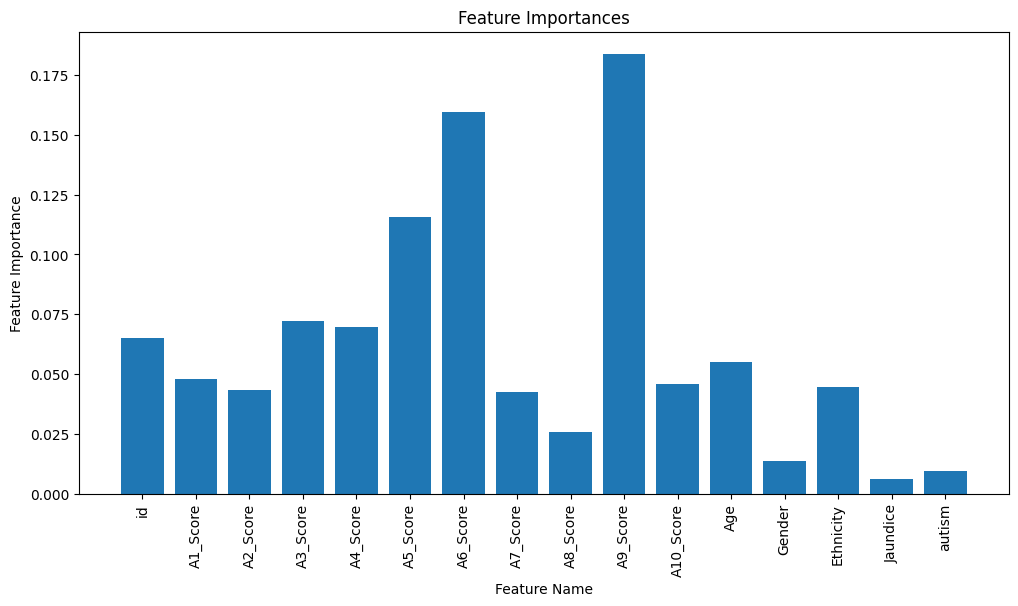

Overall Importance of All Features: 1.0
Feature: id, Importance: 0.06503184757407168
Feature: A1_Score, Importance: 0.0481366235685567
Feature: A2_Score, Importance: 0.04330113450522101
Feature: A3_Score, Importance: 0.07223701433330593
Feature: A4_Score, Importance: 0.0695487161768835
Feature: A5_Score, Importance: 0.11553052697344558
Feature: A6_Score, Importance: 0.15941574762986827
Feature: A7_Score, Importance: 0.042525371036734094
Feature: A8_Score, Importance: 0.02570785953021154
Feature: A9_Score, Importance: 0.1839049311676435
Feature: A10_Score, Importance: 0.045721597654122474
Feature: Age, Importance: 0.054994308125782376
Feature: Gender, Importance: 0.01348386891892934
Feature: Ethnicity, Importance: 0.04446302565826924
Feature: Jaundice, Importance: 0.006336252683056936
Feature: autism, Importance: 0.009661174463897929


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are your training and testing data
rf = RandomForestClassifier()
rf.fit(X_train, y_train_A)

# Get feature importances
importances = rf.feature_importances_

# Calculate overall importance
overall_importance = np.sum(importances)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

print(f"Overall Importance of All Features: {overall_importance}")

# Print individual feature importances
for feature_name, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature_name}, Importance: {importance}")


In [ ]:


# Define classifiers
classifiers = {
    'MLP': MLPClassifier(max_iter=500),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier()
}

# Evaluate and compare classifiers
results = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled_A, y_train_A)

    # Make predictions
    y_pred = clf.predict(X_test_scaled_A)

    # Evaluate different metrics
    accuracy = accuracy_score(y_test_A, y_pred)
    roc_auc = roc_auc_score(y_test_A, clf.predict_proba(X_test_scaled_A)[:, 1])
    f1 = f1_score(y_test_A, y_pred)
    precision = precision_score(y_test_A, y_pred)
    recall = recall_score(y_test_A, y_pred)
    mcc = matthews_corrcoef(y_test_A, y_pred)
    kappa = cohen_kappa_score(y_test_A, y_pred)
    logloss = log_loss(y_test_A, clf.predict_proba(X_test_scaled_A)[:, 1])

    # Store results
    results[clf_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'MCC': mcc,
        'Kappa': kappa,
        'Log Loss': logloss
    }

# Display results
print("Classification Results:")
for clf_name, metrics in results.items():
    print(f"{clf_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")


Classification Results:
MLP:
  Accuracy: 0.9929
  ROC AUC: 1.0000
  F1-Score: 0.9885
  Precision: 0.9773
  Recall: 1.0000
  MCC: 0.9835
  Kappa: 0.9834
  Log Loss: 0.0265


AdaBoost:
  Accuracy: 0.9929
  ROC AUC: 1.0000
  F1-Score: 0.9882
  Precision: 1.0000
  Recall: 0.9767
  MCC: 0.9833
  Kappa: 0.9832
  Log Loss: 0.5253


Random Forest:
  Accuracy: 0.9574
  ROC AUC: 0.9887
  F1-Score: 0.9268
  Precision: 0.9744
  Recall: 0.8837
  MCC: 0.8991
  Kappa: 0.8969
  Log Loss: 0.1551


Decision Tree:
  Accuracy: 0.9007
  ROC AUC: 0.8894
  F1-Score: 0.8409
  Precision: 0.8222
  Recall: 0.8605
  MCC: 0.7692
  Kappa: 0.7688
  Log Loss: 3.5788


Naive Bayes:
  Accuracy: 0.9645
  ROC AUC: 0.9848
  F1-Score: 0.9425
  Precision: 0.9318
  Recall: 0.9535
  MCC: 0.9170
  Kappa: 0.9169
  Log Loss: 0.3456


Logistic Regression:
  Accuracy: 1.0000
  ROC AUC: 1.0000
  F1-Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  MCC: 1.0000
  Kappa: 1.0000
  Log Loss: 0.0323


SVM:
  Accuracy: 0.9645
  ROC AUC

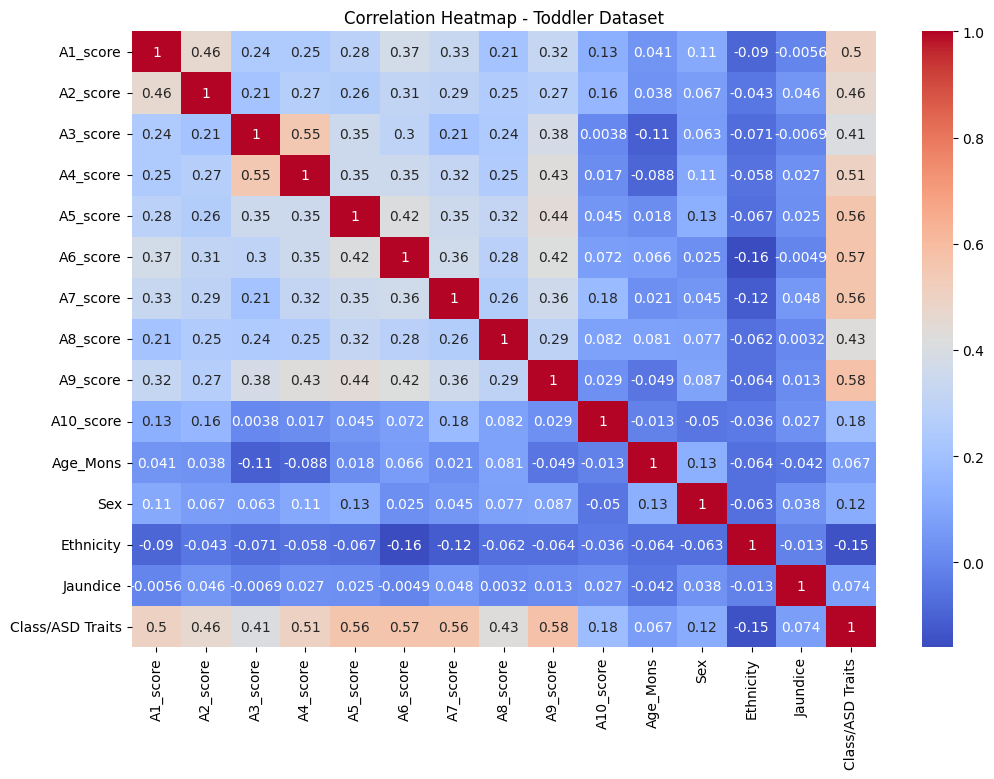

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1, df2, df3, and df4 are your four datasets

# Heatmap for df1
plt.figure(figsize=(12, 8))
sns.heatmap(Toddler_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Toddler Dataset')
plt.show()


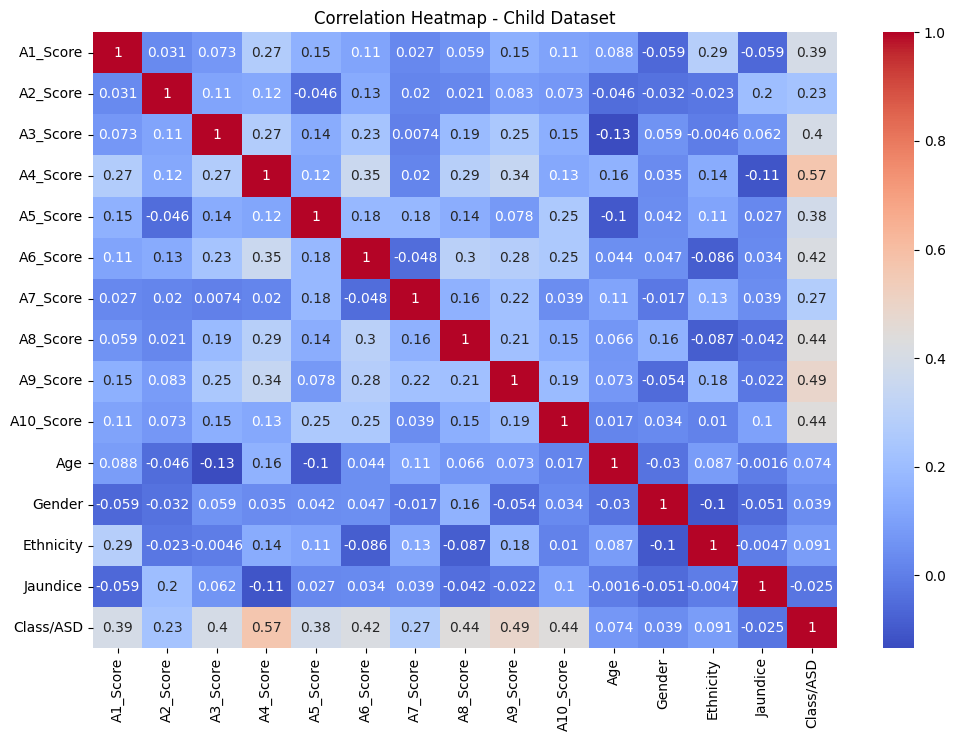

In [ ]:
# Heatmap for df2
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Child Dataset')
plt.show()

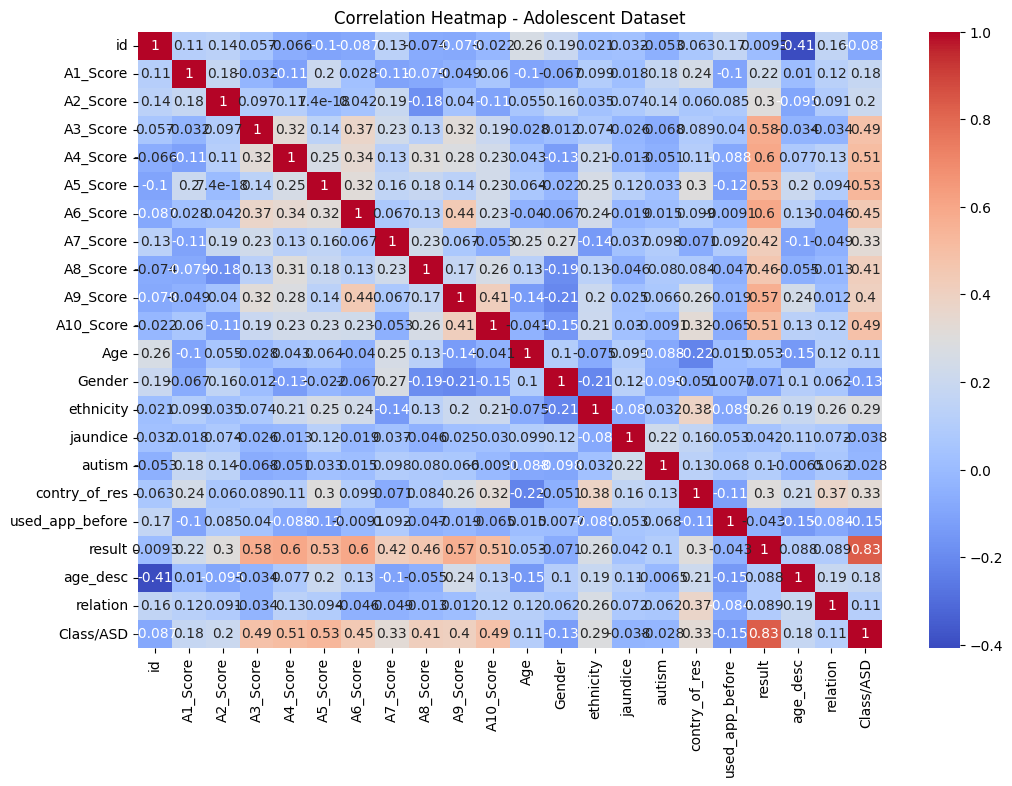

In [ ]:
# Heatmap for df3
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Adolescent Dataset')
plt.show()


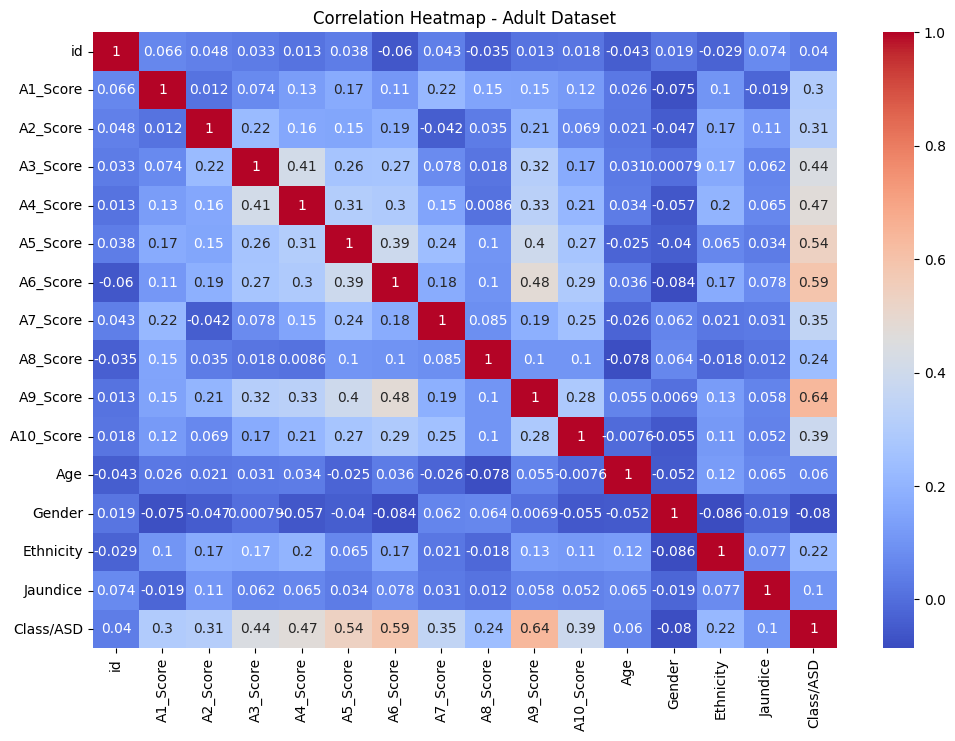

In [ ]:
# Heatmap for df4
plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Adult Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
# Set the parameters on the 'clf' step of the pipeline
param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf', 'sigmoid'],
    'clf__gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm = SVC()

# Create a pipeline with scaling and SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm)
])

# Perform grid search with 5-fold cross-validation
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, n_jobs=-1)

# Fit the grid search model on the training data
grid_search_svm.fit(X_train_scaled_T , y_train_T)

# Get the best hyperparameters and best model for SVM
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

In [ ]:
#
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 100, 50), (50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

# Initialize the MLP classifier
mlp = MLPClassifier()

# Perform grid search with 5-fold cross-validation
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, n_jobs=-1)

# Fit the grid search model on the training data
grid_search_mlp.fit(X_train_scaled_C , y_train_C)

# Get the best hyperparameters and best model for MLP
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_


In [ ]:
# Adolescent
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm = SVC()

# Create a pipeline with scaling and SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm)
])

# Perform grid search with 5-fold cross-validation
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, n_jobs=-1)

# Fit the grid search model on the training data
grid_search_svm.fit(X_train_scaled_Ao , y_train_Ao)

# Get the best hyperparameters and best model for SVM
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_


ValueError: Invalid parameter 'C' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
# ADULT
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 100, 50), (50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

# Initialize the MLP classifier
mlp = MLPClassifier()

# Perform grid search with 5-fold cross-validation
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, n_jobs=-1)

# Fit the grid search model on the training data
grid_search_mlp.fit(X_train_scaled_A , y_train_A)

# Get the best hyperparameters and best model for MLP
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import pandas as pd

# Data for the table
data = {
    'Model': ['SVM_Toddler', 'SVM_Adolescent', 'MLP_Child', 'MLP_Adult'],
    'C': [0.1, 1, '-', '-'],
    'Gamma': ['scale', 'scale', '-', '-'],
    'Kernel': ['linear', 'sigmoid', '-', '-'],
    'Activation': ['-', '-', 'tanh', 'tanh'],
    'Alpha': ['-', '-', 0.0001, 0.0001],
    'Hidden Layer Sizes': ['-', '-', '(100,)', '(50, 100, 50)'],
    'Learning Rate': ['-', '-', 'adaptive', 'constant'],
    'Solver': ['-', '-', 'adam', 'adam'],
    'Accuracy': ['-', '-', '-', '0.9982']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Hide the axes
ax.axis('off')

# Create the table
tab = table(ax, df, loc='center', colWidths=[0.15]*len(df.columns))

# Set font size
tab.auto_set_font_size(False)
tab.set_fontsize(10)

# Save the table as an image
plt.savefig('hyperparameters_table.png', bbox_inches='tight')
plt.show()
